In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
input_path = "./Exercise 7.1/"

# 7.1. Harris method

## Use the Harris method to detect the corners of the squares that compose the figure   below. From those squares determine:

 i) How many different squares compose the figure.

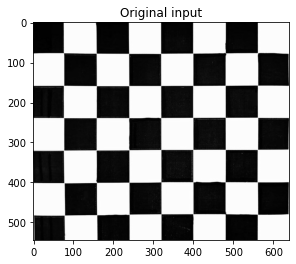

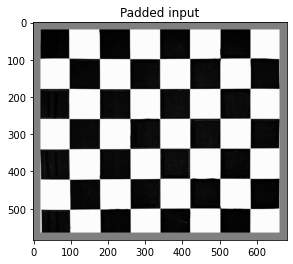

In [4]:
# Load image
img = cv2.imread(input_path + 'chessBoard.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, 'gray')
plt.title("Original input")
plt.show()

# Pad image to detect the corners of the most outter squares
# pad with gray so it is not fused with the white or black squares
sizeX, sizeY = img.shape
pad = 20
padImg = np.ones((sizeX + pad*2, sizeY + pad*2), dtype=np.uint8) * 128
padImg[pad:-pad, pad:-pad] = img
plt.imshow(padImg, 'gray')
plt.title("Padded input")
plt.show()

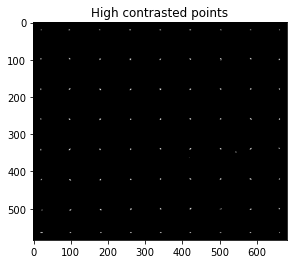

In [10]:
# Apply Harris to detect the corners
corners = cv2.cornerHarris(padImg, 2, 3, 0.04)
corners[corners > 0.01*corners.max()] = 255
corners[corners != 255] = 0
plt.imshow(corners, cmap='gray') 
plt.title("High contrasted points")
plt.show()

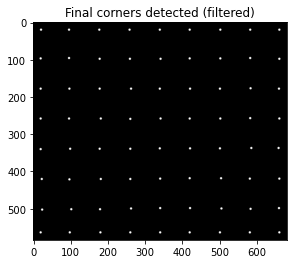

In [32]:
final_corners = []  # list of coordinates sorted by the x coordinate
distance_threshold = 50
for x in range(pad, sizeX+pad):  
    for y in range(pad, sizeY+pad):
        if corners[x,y] > 0:  # point with high contrast
            point = (x,y)

            for (x2,y2) in final_corners:
                if np.hypot(x-x2,y-y2) < distance_threshold:
                    break
            else:  # executed only when the point is not close to any of the final corners
                final_corners.append(point)

corners_copy = np.zeros_like(padImg)
for p in final_corners:
    cv2.circle(corners_copy, (p[1],p[0]), 3, (255,255,255), -1)
    
plt.imshow(cornersCopy, 'gray')
plt.title("Final corners detected (filtered)")
plt.show()

In [13]:
# Organise the points in a grid
thresh_x = 10

grid = []
representer = final_corners[0]
row = [final_corners[0]]

# Group the corners of the same row in the same list
for c in final_corners[1:]:
    if abs(c[0] - representer[0]) < thresh_x:
        row.append(c)
    else:
        row = sorted(row, key=lambda p:p[1])  # sort by column (they are already sorted by row)
        grid.append(row)
        row = [c]
        representer = c
grid.append(row)
  
n_rows, n_cols = len(grid), len(grid[0])
n_squares = (n_rows-1) * (n_cols-1)
print(f"Number of squares found: {n_squares}")    

Number of squares found: 56


ii) The average size of each of the squares.

In [31]:
cumulative_width = 0
cumulative_height = 0

for i in range(0, n_rows-1):
    for j in range(0, n_cols-1):
        y1, x1 = grid[i][j]
        
        width = grid[i][j+1][1] - x1
        height = grid[i+1][j][0] - y1
        
        assert(width > 0)
        assert(height > 0)
        
        cumulative_width += width
        cumulative_height += height
        
mean_width = cumulative_width / n_squares
mean_height = cumulative_height / n_squares
mean_area = mean_width * mean_height
print(f"Mean area of the squares: {mean_area} pixels (width ~= {mean_width}, height ~= {mean_height})")

Mean area of the squares: 6179.3954081632655 pixels (width ~= 79.66071428571429, height ~= 77.57142857142857)
